# Sentement Analysis from Covid-19 Tweets using Bidirectional Gated Recurrent Unit (GRU) Architecture
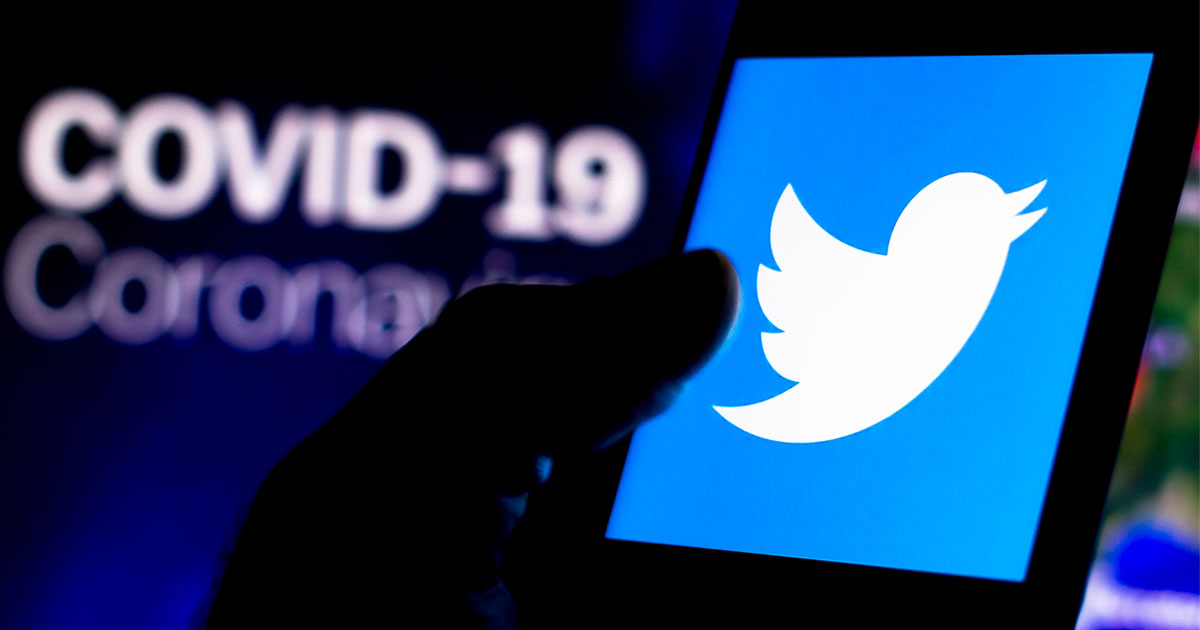

# Importing Libraries

In [5]:
import numpy as np
import pandas as pd 
import missingno as m
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud,STOPWORDS
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize,sent_tokenize
import re,string,unicodedata
from keras.preprocessing import text, sequence
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.model_selection import train_test_split
from string import punctuation
import keras
from keras.models import Sequential
import tensorflow as tf

import matplotlib.pyplot as plt
import seaborn as sns

from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

import tensorflow as tf

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\KIIT\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


# Reading the Datasets

In [6]:
train_data = pd.read_csv('Corona_NLP_train.csv', encoding='latin_1')
train_data.head()

UserName  ScreenName   Location     TweetAt  \
0      3799       48751     London  16-03-2020   
1      3800       48752         UK  16-03-2020   
2      3801       48753  Vagabonds  16-03-2020   
3      3802       48754        NaN  16-03-2020   
4      3803       48755        NaN  16-03-2020   

                                       OriginalTweet           Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...             Neutral  
1  advice Talk to your neighbours family to excha...            Positive  
2  Coronavirus Australia: Woolworths to give elde...            Positive  
3  My food stock is not the only one which is emp...            Positive  
4  Me, ready to go at supermarket during the #COV...  Extremely Negative

In [7]:
test_data = pd.read_csv("Corona_NLP_test.csv",encoding='latin_1')
test_data.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
2         3       44955                  NaN  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
2  Find out how you can protect yourself and love...  Extremely Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral

In [8]:
train_data.shape

(41157, 6)

In [9]:
test_data.shape

(3798, 6)

# Data PreProcessing

<AxesSubplot:>

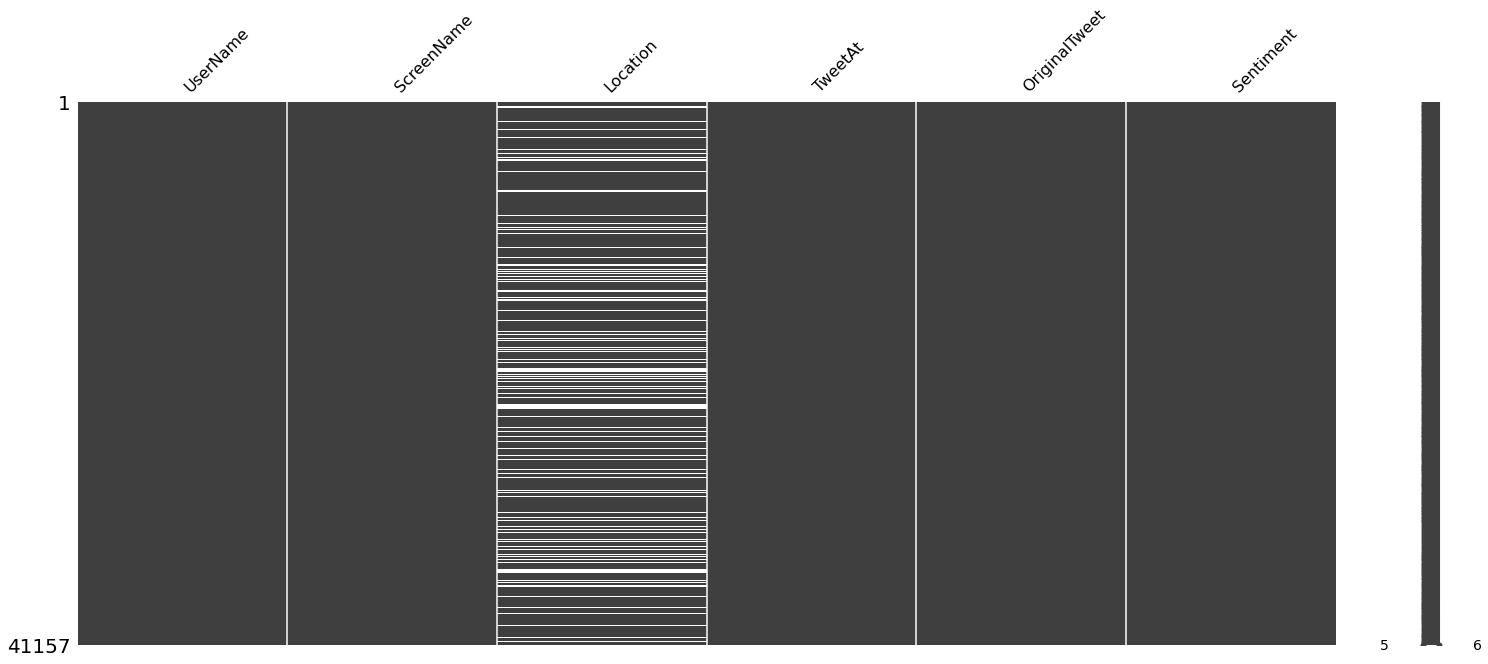

In [10]:
m.matrix(train_data)

<AxesSubplot:>

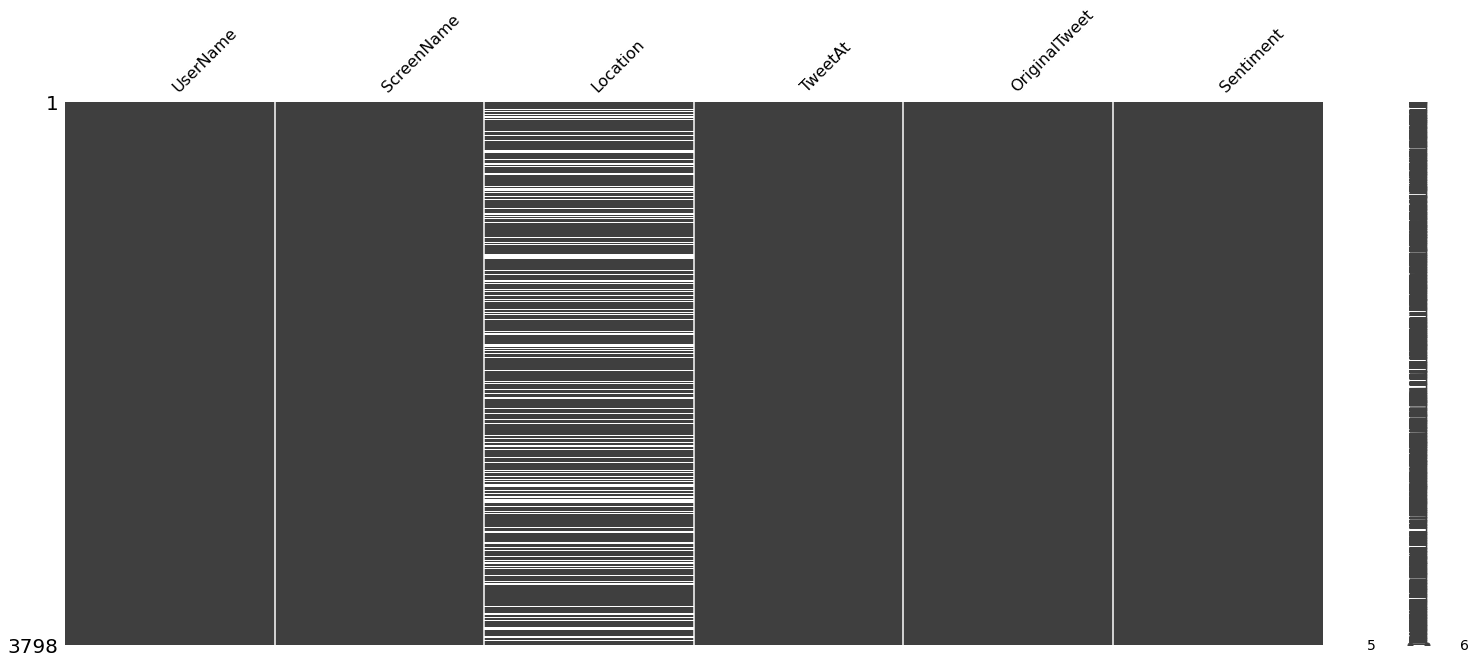

In [11]:
m.matrix(test_data)

# Dropping Dublicate Values

In [12]:
train_data.drop_duplicates(inplace= True)
test_data.drop_duplicates(inplace=True)


# Dropping the Null Values

In [13]:
train_data.dropna(inplace=True)
test_data.dropna(inplace=True)

<AxesSubplot:>

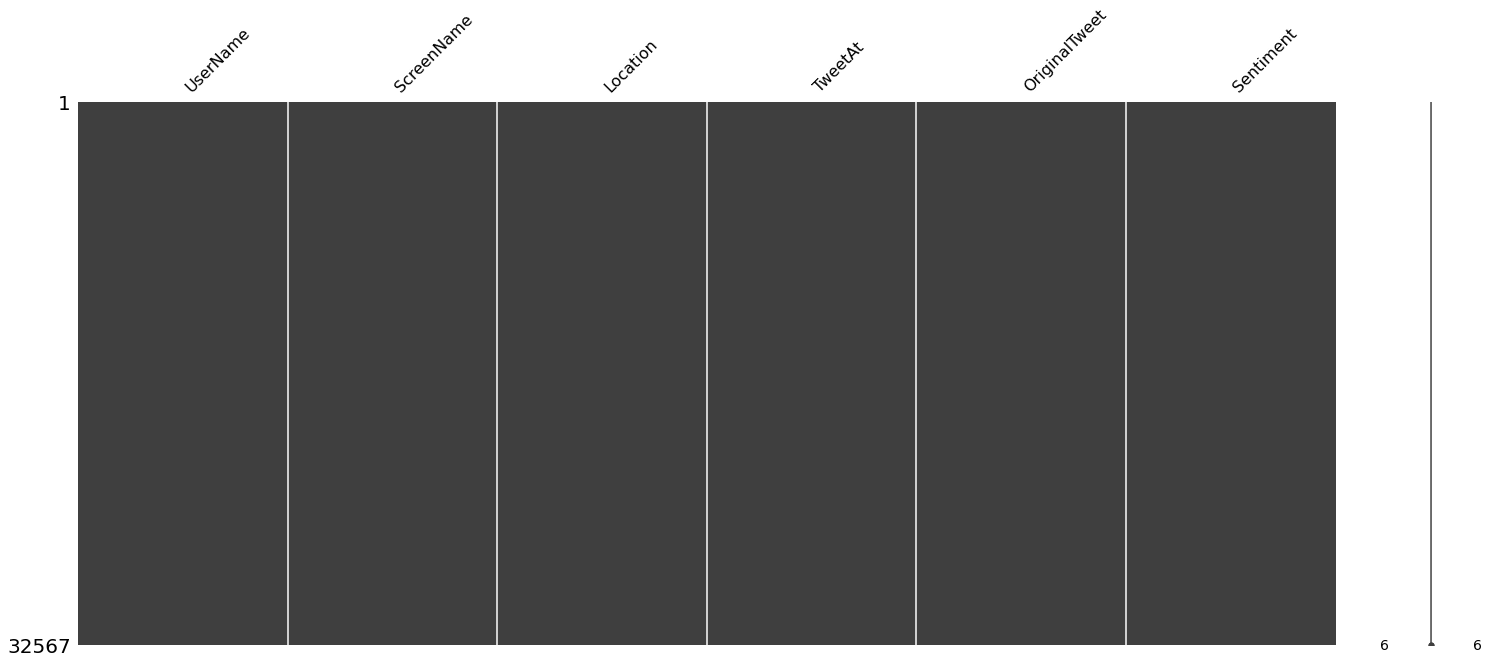

In [14]:
m.matrix(train_data)

<AxesSubplot:>

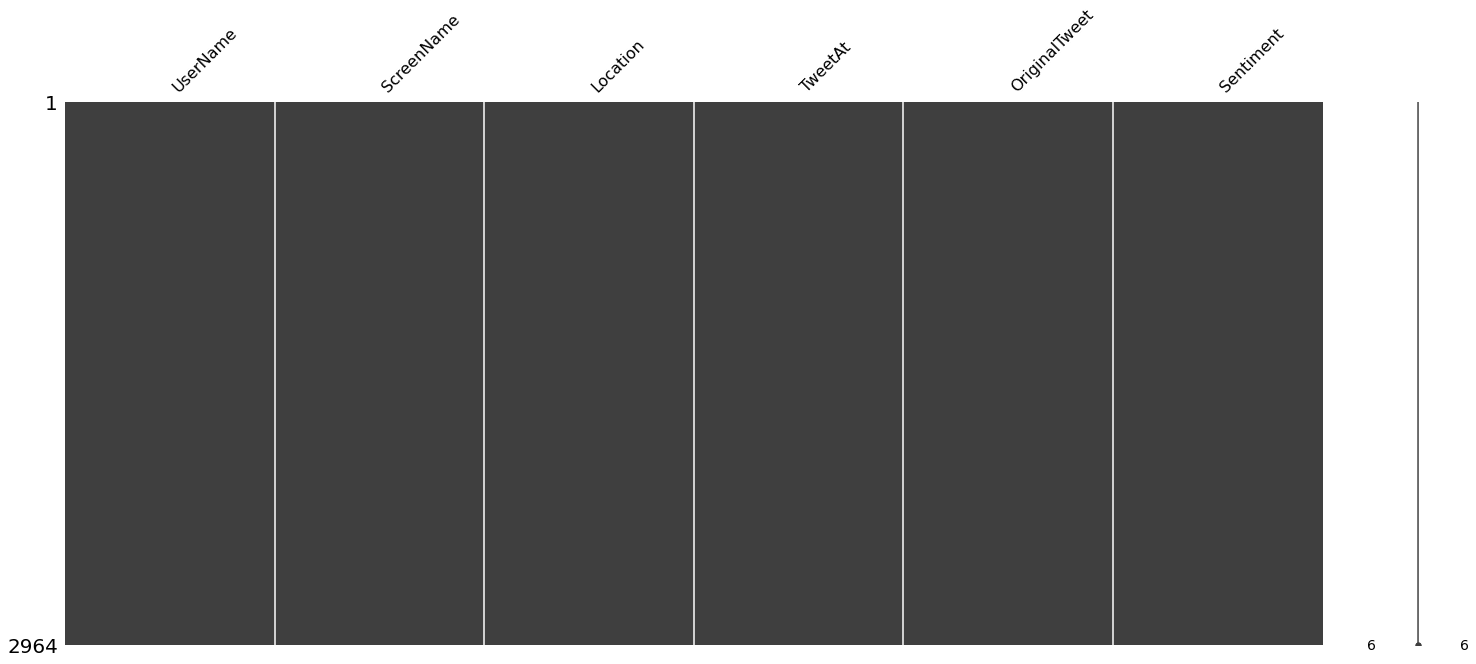

In [15]:
m.matrix(test_data)

# Final Train and Test Dataset

In [16]:
train = train_data
test = test_data

In [17]:
train.head()

UserName  ScreenName                   Location     TweetAt  \
0      3799       48751                     London  16-03-2020   
1      3800       48752                         UK  16-03-2020   
2      3801       48753                  Vagabonds  16-03-2020   
5      3804       48756  ÃT: 36.319708,-82.363649  16-03-2020   
6      3805       48757       35.926541,-78.753267  16-03-2020   

                                       OriginalTweet Sentiment  
0  @MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...   Neutral  
1  advice Talk to your neighbours family to excha...  Positive  
2  Coronavirus Australia: Woolworths to give elde...  Positive  
5  As news of the regionÂs first confirmed COVID...  Positive  
6  Cashier at grocery store was sharing his insig...  Positive

In [18]:
test.head()

UserName  ScreenName             Location     TweetAt  \
0         1       44953                  NYC  02-03-2020   
1         2       44954          Seattle, WA  02-03-2020   
3         4       44956          Chicagoland  02-03-2020   
4         5       44957  Melbourne, Victoria  03-03-2020   
5         6       44958          Los Angeles  03-03-2020   

                                       OriginalTweet           Sentiment  
0  TRENDING: New Yorkers encounter empty supermar...  Extremely Negative  
1  When I couldn't find hand sanitizer at Fred Me...            Positive  
3  #Panic buying hits #NewYork City as anxious sh...            Negative  
4  #toiletpaper #dunnypaper #coronavirus #coronav...             Neutral  
5  Do you remember the last time you paid $2.99 a...             Neutral

In [19]:
train.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [20]:
test.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

# Plotting The Target Variable for both the Dataset

In [21]:
import plotly.express as px
fig = px.histogram(train, x="Sentiment")
fig.show()

In [22]:
import plotly.express as px
fig = px.histogram(test, x="Sentiment")
fig.show()

# Text Cleaning

In [20]:
stop_word = stopwords.words('english')

In [21]:
def clean(text):    
    text = re.sub(r'http\S+', " ", text) #     remove urls
    text = re.sub('r<.*?>',' ', text) #     remove html tags
    text = re.sub(r'#\w+', ' ', text) #     remove hastags
    text = re.sub(r'@\w+',' ',text) #     remove mentions
    text = re.sub(r'\d+', ' ', text) #     remove digits
    text = text.split()
    text = " ".join([word for word in text if not word in stop_word]) #     remove stop words      
    return text

In [22]:
train['OriginalTweet'] = train['OriginalTweet'].apply(lambda x: clean(x))
test['OriginalTweet'] = test['OriginalTweet'].apply(lambda x: clean(x))

In [23]:
train.head()

UserName  ...  Sentiment
0      3799  ...    Neutral
1      3800  ...   Positive
2      3801  ...   Positive
5      3804  ...   Positive
6      3805  ...   Positive

[5 rows x 6 columns]

In [54]:
test.head() 

UserName  ...           Sentiment
0         1  ...  Extremely Negative
1         2  ...            Positive
3         4  ...            Negative
4         5  ...             Neutral
5         6  ...             Neutral

[5 rows x 6 columns]

In [24]:
trainn = train.iloc[:,4:]
testt = test.iloc[:,4:]

In [25]:
trainn.Sentiment.unique()

array(['Neutral', 'Positive', 'Negative', 'Extremely Positive',
       'Extremely Negative'], dtype=object)

# Labelling Our Target Variable 
  - Neutral = 0
  - Positive = 1
  - Negative = 2
  - Extremely Positive = 3
  - Extremely Negative = 4 

In [26]:
l = {"Neutral":0, "Positive":1,"Negative":2,"Extremely Positive":3,"Extremely Negative":4}

In [27]:
trainn['Sentiment'] = trainn['Sentiment'].map(l)
testt['Sentiment']  = testt['Sentiment'].map(l)

In [28]:
trainn.sample(5)

OriginalTweet  Sentiment
5507   United States: October thru January , , + infl...          2
25721  Will states going expect generous consumer ref...          1
31099  In keeping social distancing platform, supplie...          1
21075  Shoutout working tirelessly covid- crisis with...          1
955    Going grocery store requires blast I leave hon...          3

# Wordplot of Train Tweets

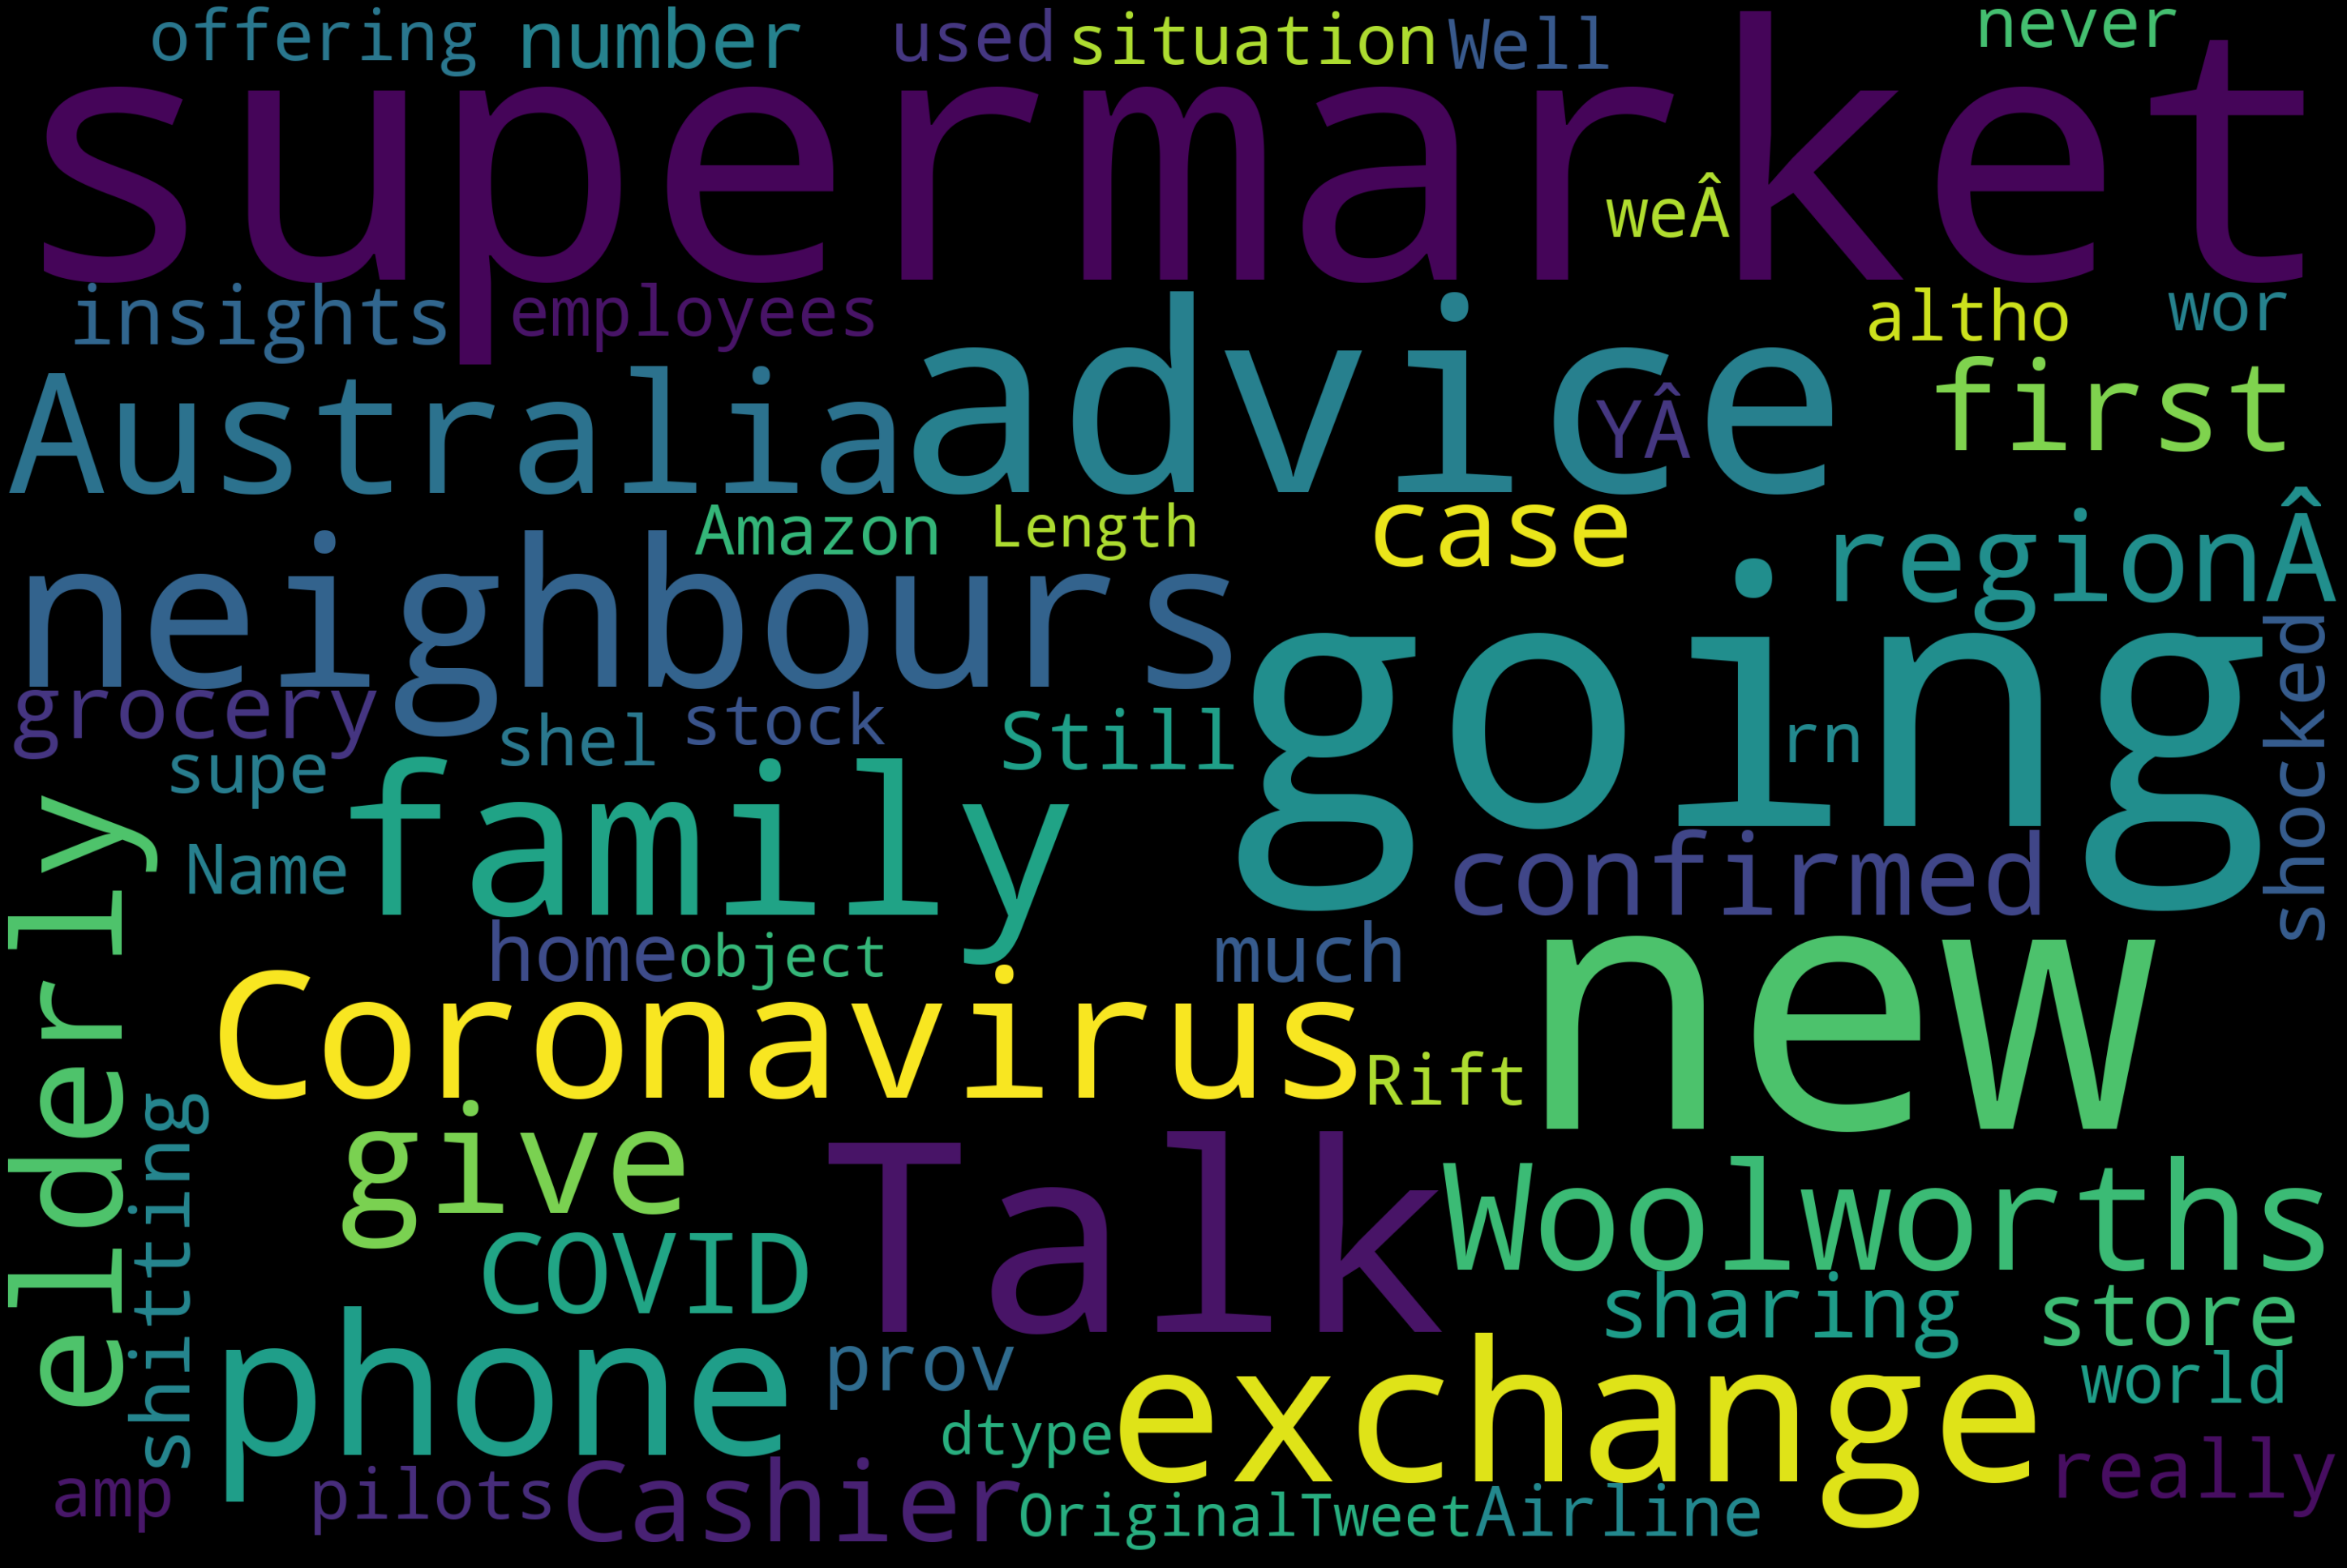

In [29]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = trainn.OriginalTweet
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

In [30]:
testt.sample(5)

OriginalTweet  Sentiment
372   Oh irony crowded place stock food supplies sta...          2
2880  Please please ask people Ricky buy need Don le...          3
1641  More people grocery store SAQ. That's first Fr...          0
3735  When there's much need hamd sanitizers compani...          2
3366  The panic buying IÂve done dog food. IÂm pro...          3

# Wordplot of Test Tweets

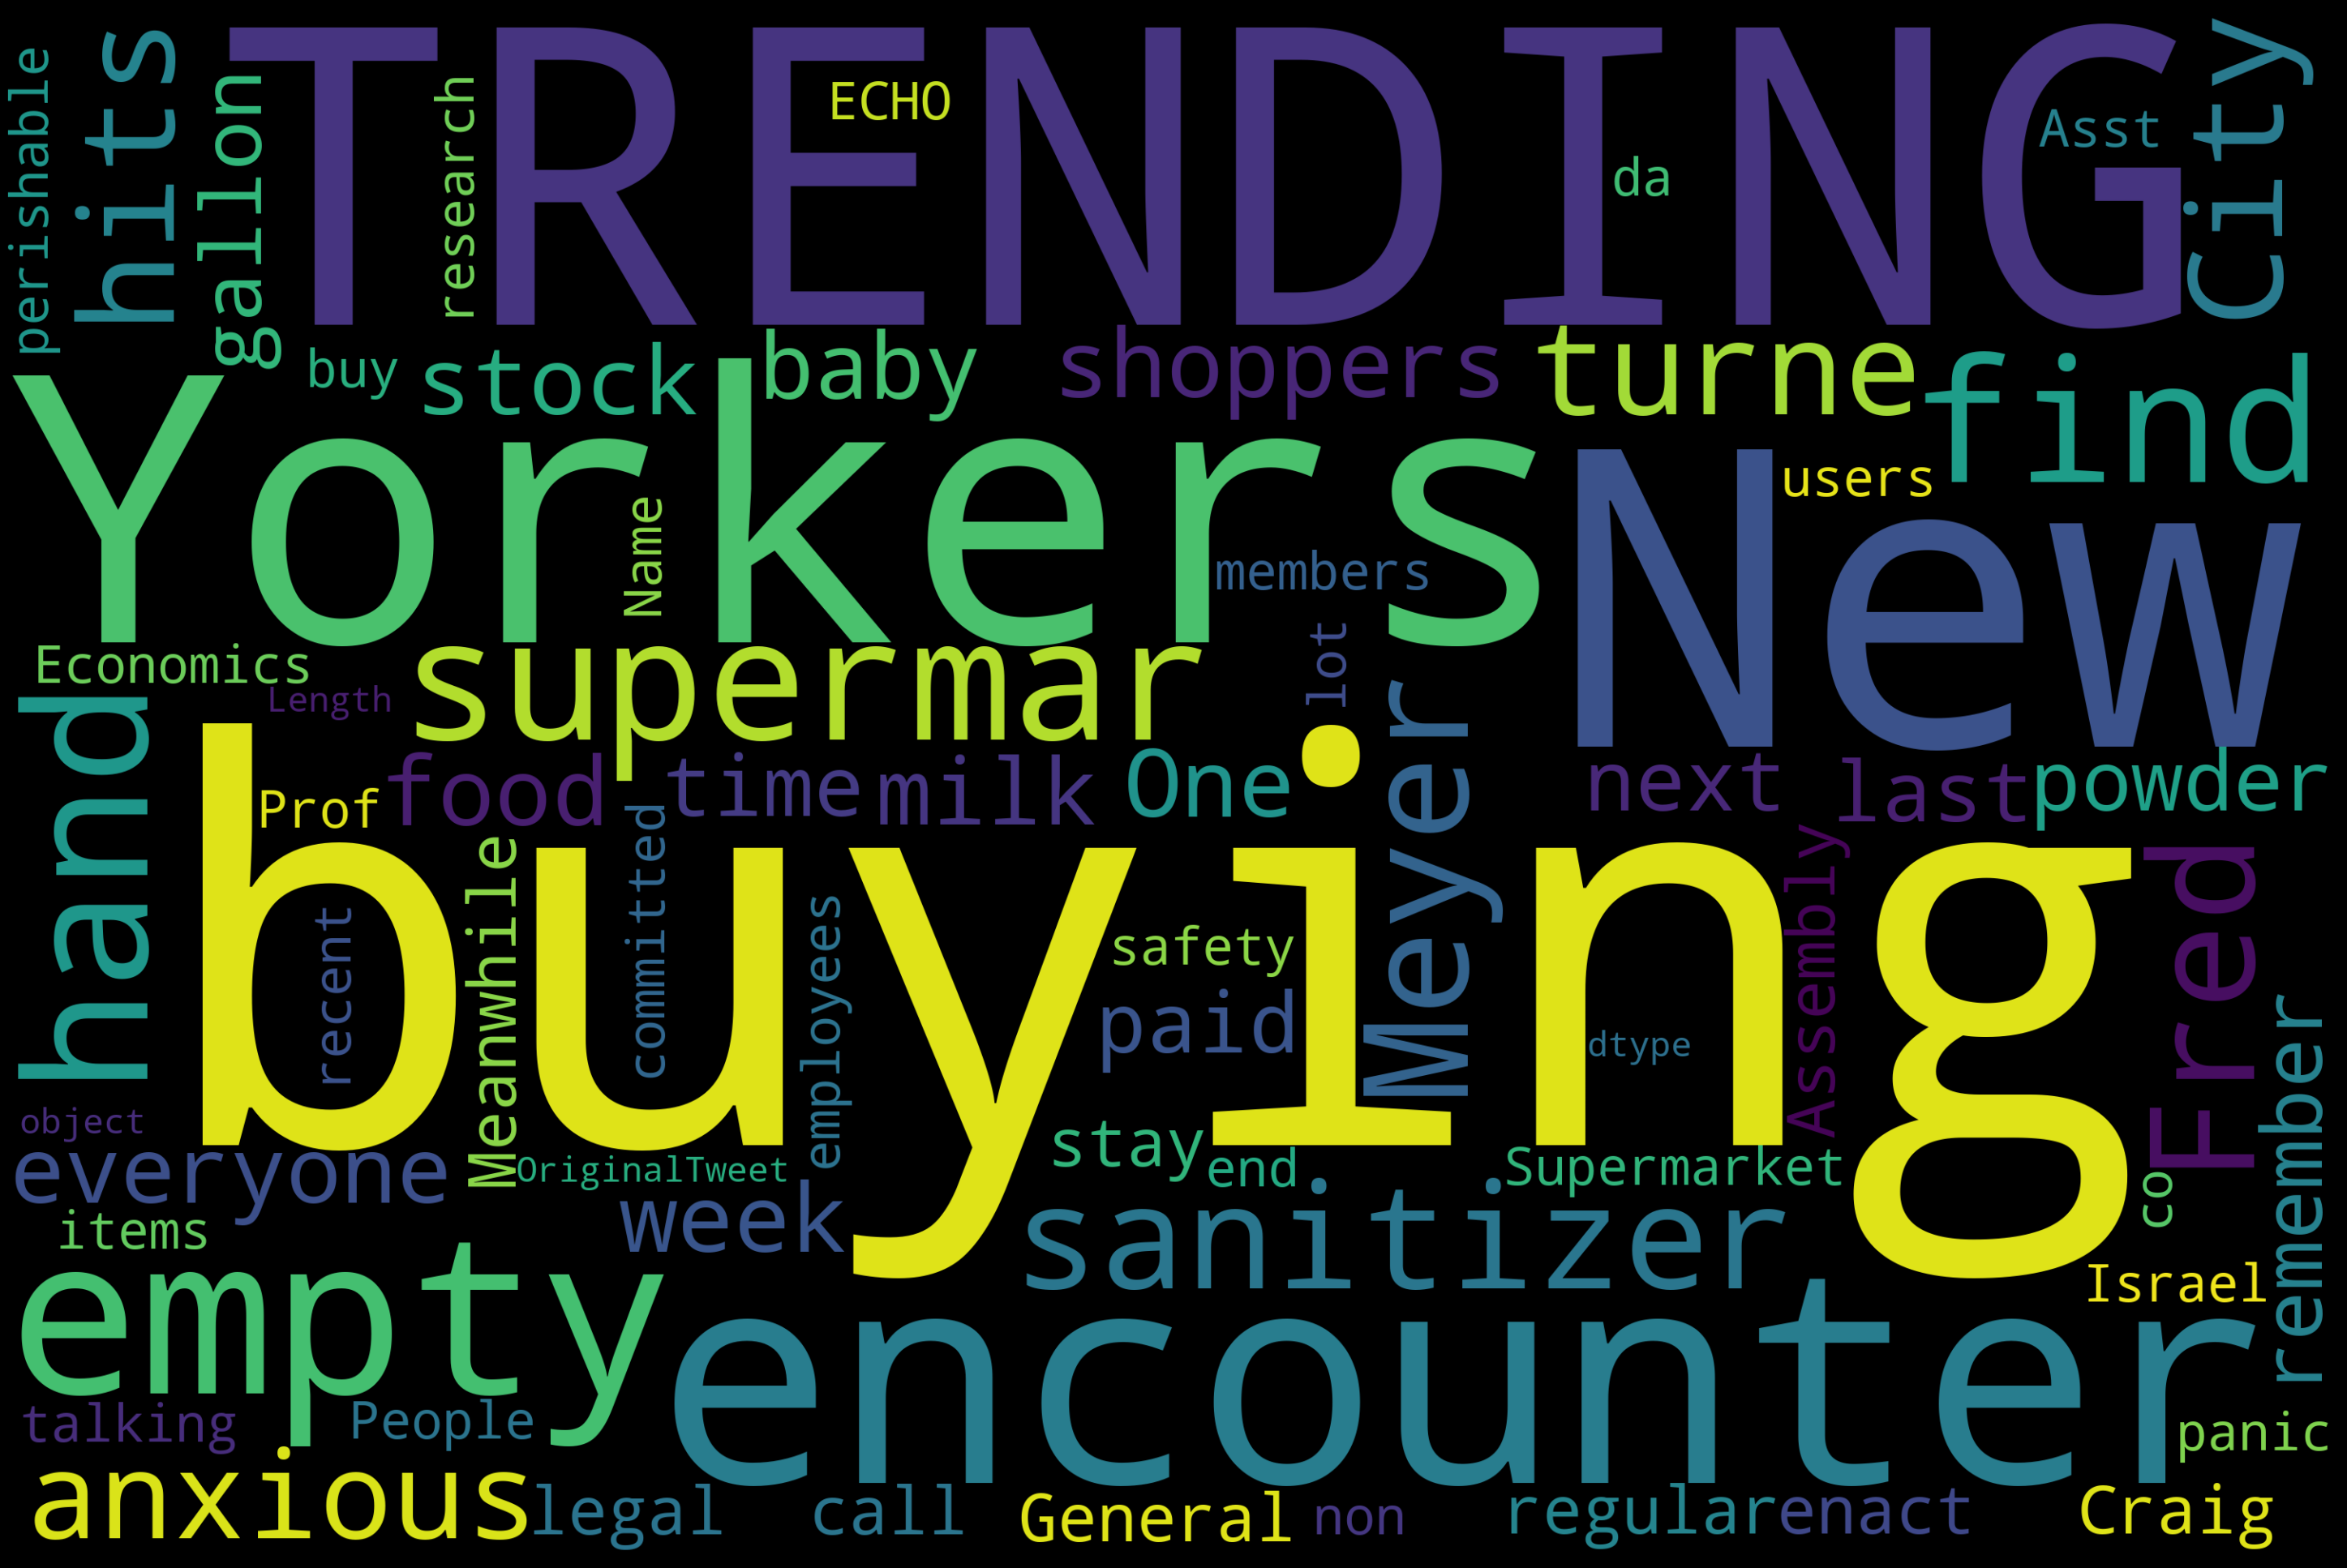

In [31]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt
text = testt.OriginalTweet
wordcloud = WordCloud(
    width = 3000,
    height = 2000,
    background_color = 'black',
    max_words=4000,
    stopwords = STOPWORDS).generate(str(text))
fig = plt.figure(
    figsize = (40, 30),
    facecolor = 'k',
    edgecolor = 'k')
plt.imshow(wordcloud, interpolation = 'bilinear')
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

# X_train, X_test, y_train, y_test Split

In [32]:
X_train = trainn['OriginalTweet']
X_test = testt['OriginalTweet']

y_train = trainn['Sentiment']
y_test = testt['Sentiment']

In [33]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(32567,) (32567,)
(2964,) (2964,)


## Maximun lenght

In [ ]:
max_len = np.max(X_train.apply(lambda x :len(x)))

# Tokenizer 

In [37]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(X_train)
vocab_length = len(tokenizer.word_index) + 1

X_train = tokenizer.texts_to_sequences(X_train)
X_test = tokenizer.texts_to_sequences(X_test)

X_train = pad_sequences(X_train, maxlen=max_len, padding='post')
X_test = pad_sequences(X_test, maxlen=max_len, padding='post')
embedding_dim = 16

In [43]:
from keras.utils import to_categorical

y_train = to_categorical(y_train, 5)
y_test = to_categorical(y_test, 5)

# Building Bi-directional GRU Model 

In [40]:
model = tf.keras.Sequential([
    tf.keras.layers.Embedding(vocab_length, embedding_dim, input_length=max_len),
    tf.keras.layers.Bidirectional(tf.keras.layers.GRU(256, return_sequences=True)),
    tf.keras.layers.GlobalAveragePooling1D(),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dropout(0.4),
    tf.keras.layers.Dense(5, activation='softmax')
])

In [41]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 286, 16)           508144    
_________________________________________________________________
bidirectional (Bidirectional (None, 286, 512)          420864    
_________________________________________________________________
global_average_pooling1d (Gl (None, 512)               0         
_________________________________________________________________
dense (Dense)                (None, 64)                32832     
_________________________________________________________________
dropout (Dropout)            (None, 64)                0         
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 325       
Total params: 962,165
Trainable params: 962,165
Non-trainable params: 0
__________________________________________________

#Compiling with ADAM Optimizer and Binary Crossentropy Loss Function

In [ ]:
model.compile(loss='categorical_crossentropy',optimizer= 'adam',metrics=['accuracy'])

# Fitting Dataset into the Model

In [44]:
history = model.fit(X_train, y_train, epochs=12, 
                    validation_data=(X_test, y_test))

Epoch 1/12
1018/1018 [==============================] - 48s 42ms/step - loss: 1.5766 - accuracy: 0.2724 - val_loss: 1.2856 - val_accuracy: 0.4305
Epoch 2/12
1018/1018 [==============================] - 42s 41ms/step - loss: 1.2190 - accuracy: 0.4718 - val_loss: 0.9960 - val_accuracy: 0.5908
Epoch 3/12
1018/1018 [==============================] - 40s 40ms/step - loss: 0.8420 - accuracy: 0.6844 - val_loss: 0.7906 - val_accuracy: 0.7115
Epoch 4/12
1018/1018 [==============================] - 41s 40ms/step - loss: 0.5931 - accuracy: 0.7999 - val_loss: 0.7555 - val_accuracy: 0.7355
Epoch 5/12
1018/1018 [==============================] - 40s 39ms/step - loss: 0.4548 - accuracy: 0.8567 - val_loss: 0.7566 - val_accuracy: 0.7483
Epoch 6/12
1018/1018 [==============================] - 42s 41ms/step - loss: 0.3638 - accuracy: 0.8876 - val_loss: 0.8056 - val_accuracy: 0.7395
Epoch 7/12
1018/1018 [==============================] - 43s 42ms/step - loss: 0.2930 - accuracy: 0.9122 - val_loss: 0.8856 -

In [45]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

loss = history.history['loss']
val_loss = history.history['val_loss']

# Plotting Loss VS Validation Loss

In [3]:
import plotly.graph_objects as go
fig = go.Figure()

fig.add_trace(go.Scatter(y=loss, name='Loss',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=val_loss,  name = 'Val_Loss',
                         line=dict(color='firebrick', width=5)))

# Plotting Accuracy VS Validation Accuracy

In [4]:
fig = go.Figure()
fig.add_trace(go.Scatter(y=acc, name='Accuracy',
                         line=dict(color='royalblue', width=5)))
fig.add_trace(go.Scatter(y=val_acc,  name = 'Val_Accuracy',
                         line=dict(color='firebrick', width=5)))

# Prediction For Test Set

In [49]:
y_pred = model.predict_classes(X_test)
y_pred

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/sequential.py:450: UserWarning:

`model.predict_classes()` is deprecated and will be removed after 2021-01-01. Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).



array([4, 1, 2, ..., 2, 0, 3])

# Confusion Matrix

In [50]:
cm = confusion_matrix(np.argmax(y_test,1),y_pred)
cm

array([[399,  28,  65,   0,   5],
       [ 44, 494, 119,  54,  14],
       [ 59,  78, 550,   4, 120],
       [  5, 121,  18, 335,   3],
       [  5,   2,  87,   0, 355]])

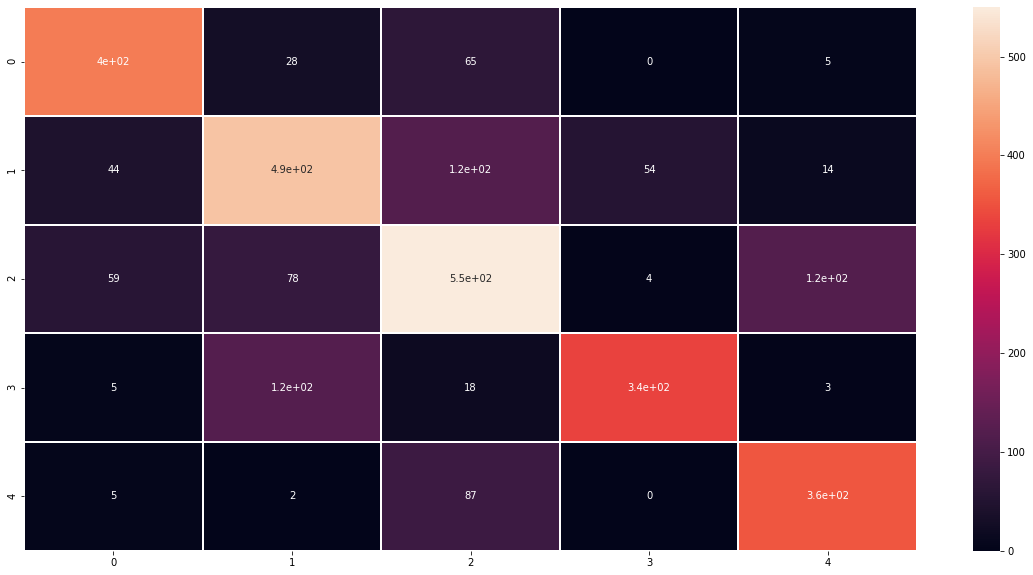

In [55]:
plt.figure(figsize=(20,10))
sns.heatmap(cm,annot=True, linewidth=1)

# Accuracy

In [56]:
from sklearn.metrics import accuracy_score
print("Accuracy : ",accuracy_score(np.argmax(y_test,1),y_pred))

Accuracy :  0.7206356275303644


# Classification Report

In [53]:
print(classification_report(np.argmax(y_test,1),y_pred))

              precision    recall  f1-score   support

           0       0.78      0.80      0.79       497
           1       0.68      0.68      0.68       725
           2       0.66      0.68      0.67       811
           3       0.85      0.70      0.77       482
           4       0.71      0.79      0.75       449

    accuracy                           0.72      2964
   macro avg       0.74      0.73      0.73      2964
weighted avg       0.72      0.72      0.72      2964



# This Model can Predict Sentement from Covid-19 Tweets with an Accuracy of 72%